## Observations and Insights

## Dependencies and starter code

In [2]:
# Dependencies and Setup
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import statistics as stats
from statistics import stdev
from scipy.stats import linregress
import seaborn as sns

# Study data files
mouse_metadata = "Mouse_metadata.csv"
study_results = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combine_df = mouse_metadata.merge(study_results, on="Mouse ID")

## Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
# of the tumor volume for each regimen
stats_df = combine_df.groupby("Drug Regimen")
count_df = stats_df['Tumor Volume (mm3)'].count()
mean_df = stats_df['Tumor Volume (mm3)'].mean()
median_df = stats_df['Tumor Volume (mm3)'].median()
std_deviation = stats_df['Tumor Volume (mm3)'].describe()["std"]
variance_stats_df = stats_df['Tumor Volume (mm3)'].var()
sem_stats_df = stats_df['Tumor Volume (mm3)'].sem()

summary_df = pd.DataFrame({"Count": count_df, "Mean": mean_df, "Median": median_df, "Standard Deviation": std_deviation, "Variance": variance_stats_df, "SEM": sem_stats_df})
summary_df



Count       Mean     Median  Standard Deviation   Variance  \
Drug Regimen                                                               
Capomulin       230  40.675741  41.557809            4.994774  24.947764   
Ceftamin        178  52.591172  51.776157            6.268188  39.290177   
Infubinol       178  52.884795  51.820584            6.567243  43.128684   
Ketapril        188  55.235638  53.698743            8.279709  68.553577   
Naftisol        186  54.331565  52.509285            8.134708  66.173479   
Placebo         181  54.033581  52.288934            7.821003  61.168083   
Propriva        161  52.322552  50.854632            6.507770  42.351070   
Ramicane        228  40.216745  40.673236            4.846308  23.486704   
Stelasyn        181  54.233149  52.431737            7.710419  59.450562   
Zoniferol       182  53.236507  51.818479            6.966589  48.533355   

                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.512884  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar plots

<IPython.core.display.Javascript object>


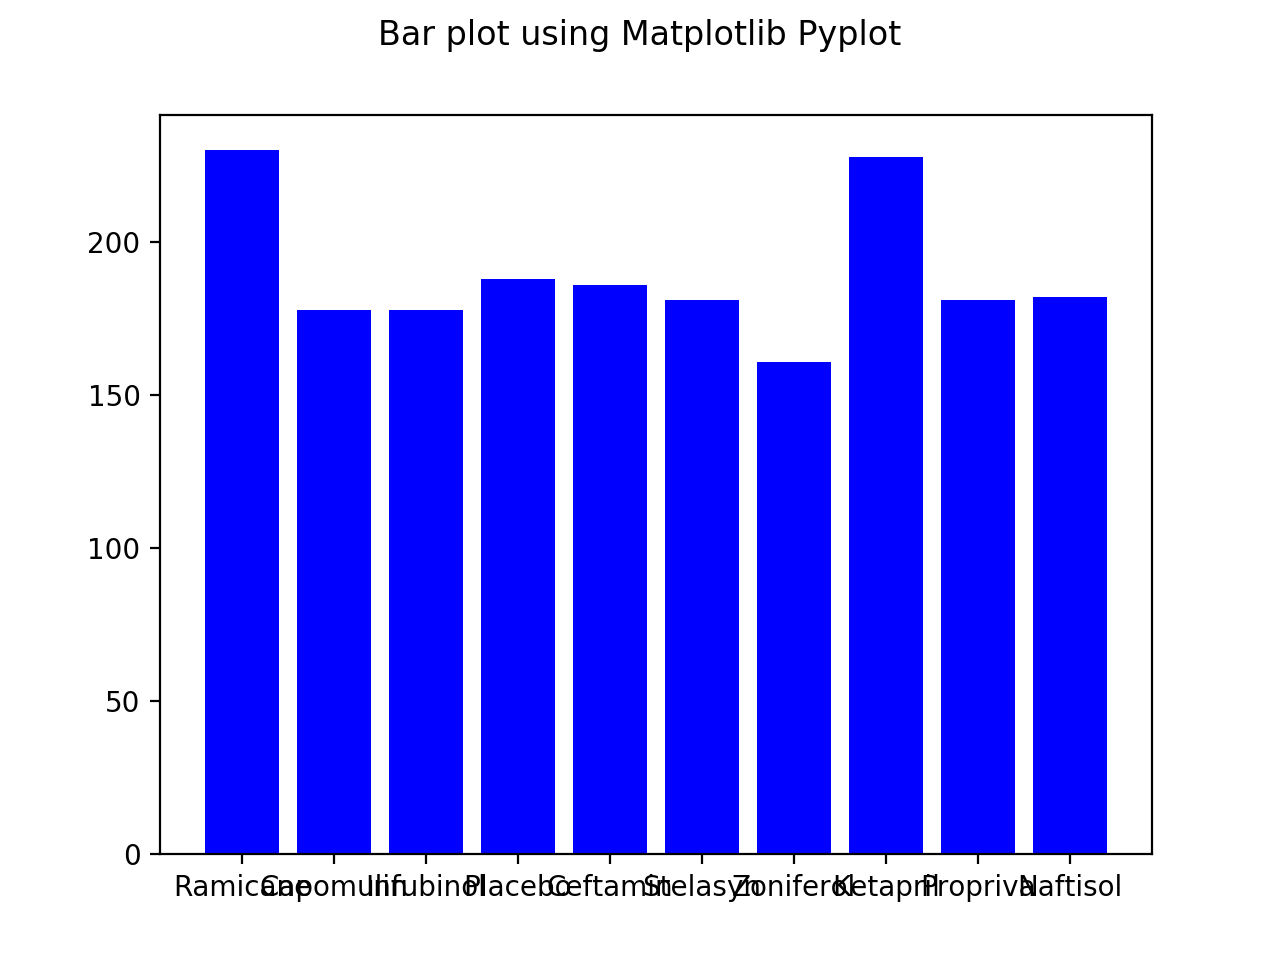

<IPython.core.display.Javascript object>


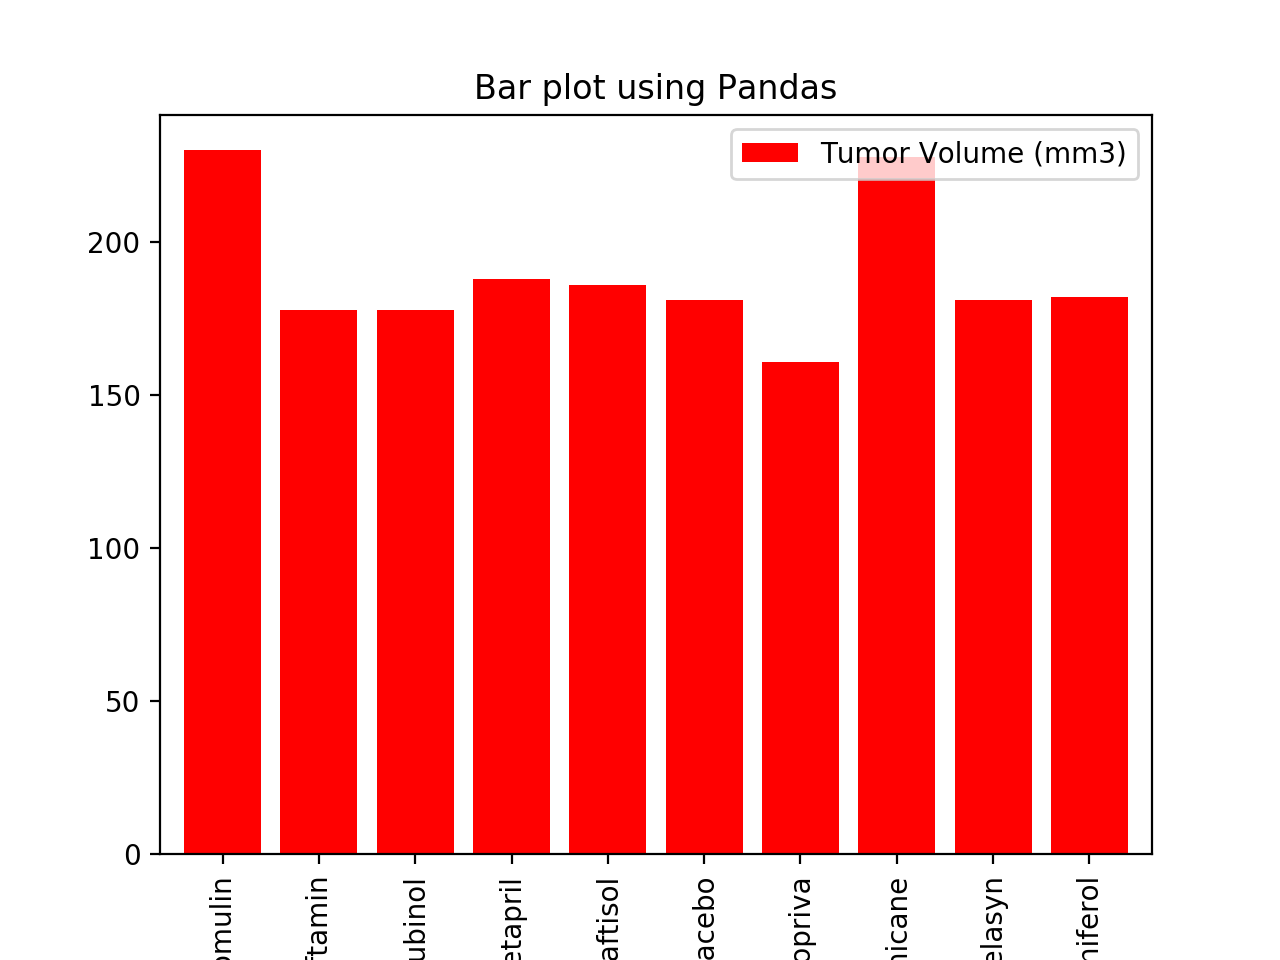

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
stats_bar_df = pd.DataFrame(count_df)
count_df = stats_df['Tumor Volume (mm3)'].count()
drugs_list = combine_df['Drug Regimen'].unique()
fig, ax1 = plt.subplots()
fig.suptitle('Bar plot using Matplotlib Pyplot')
ax1 = plt.bar(drugs_list, count_df, color='blue')
ax2 = stats_bar_df.plot.bar(color = 'red', title='Bar plot using Pandas', width = 0.8)

## Pie plots

<IPython.core.display.Javascript object>


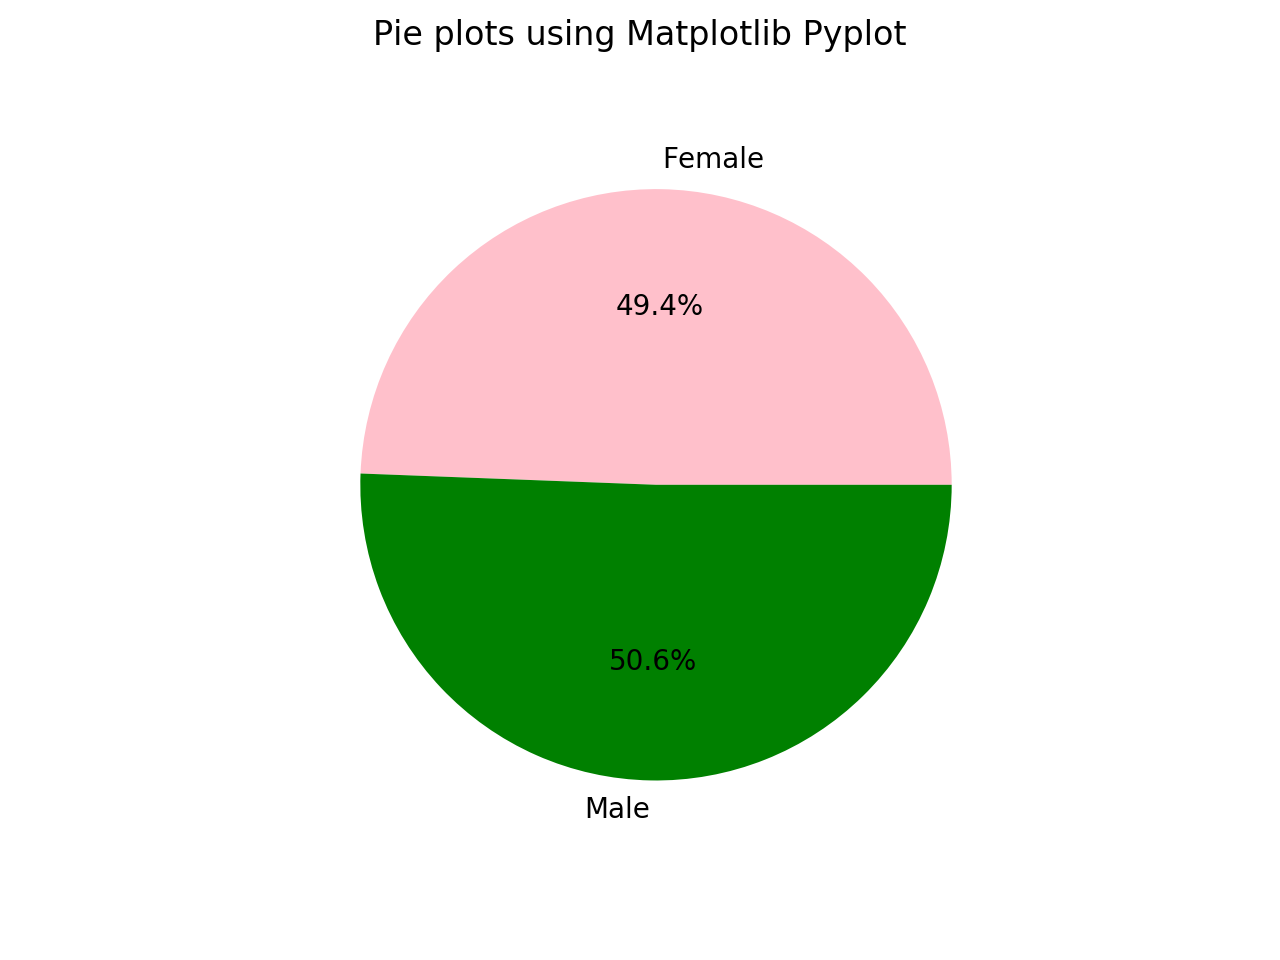

<IPython.core.display.Javascript object>


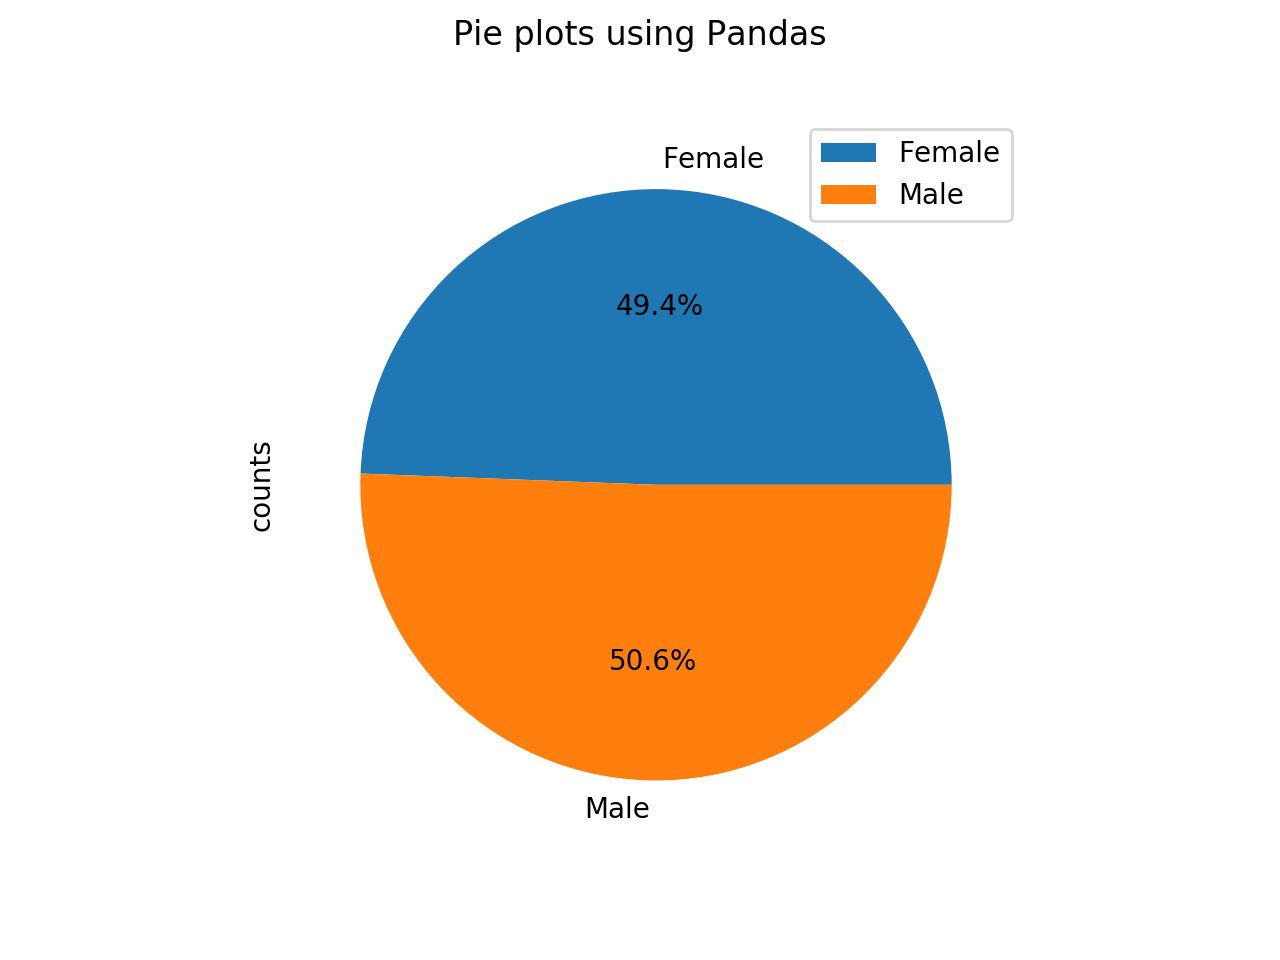

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#gender_pie_df = pd.DataFrame(combine_df.groupby('Sex').count())

gender_pie_df = pd.DataFrame({'counts': [935, 958]}, index=['Female', 'Male'])
counts = [935, 958]
#explode = (0.1, 0)
labels = ['Female', 'Male']
colors = ["pink", "green"]

fig, ax1 = plt.subplots()
fig.suptitle('Pie plots using Matplotlib Pyplot')
ax1 = plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%')
ax2 = gender_pie_df.plot(kind="pie", subplots=True, title = "Pie plots using Pandas", autopct='%1.1f%%')

## Quartiles, outliers and boxplots

In [9]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capo_df = combine_df.loc[combine_df['Drug Regimen'] == "Capomulin"]
rami_df = combine_df.loc[combine_df['Drug Regimen'] == "Ramicane"]
infl_df = combine_df.loc[combine_df['Drug Regimen'] == "Infubinol"]
ceft_df = combine_df.loc[combine_df['Drug Regimen'] == "Ceftamin"]

capo_sort_df = capo_df.sort_values(by=['Timepoint'])
rami_sort_df = rami_df.sort_values(by=['Timepoint'])
infl_sort_df = infl_df.sort_values(by=['Timepoint'])
ceft_sort_df = ceft_df.sort_values(by=['Timepoint'])

capo_sort_gp_df = capo_sort_df.groupby("Mouse ID")
#capo_sort_gp_df_2 = capo_sort_df.groupby("Mouse ID").last()
rami_sort_gp_df = rami_sort_df.groupby("Mouse ID")
infl_sort_gp_df = infl_sort_df.groupby("Mouse ID")
ceft_sort_gp_df = ceft_sort_df.groupby("Mouse ID")

capo_last_df = capo_sort_gp_df.last()
rami_last_df = rami_sort_gp_df.last()
infl_last_df = infl_sort_gp_df.last()
ceft_last_df = ceft_sort_gp_df.last()

# Calculating IQR for Capomulin
capo_last_sort_df = capo_last_df.sort_values(by=['Tumor Volume (mm3)'])
capo_tumVol = capo_last_sort_df['Tumor Volume (mm3)']
capo_quartiles = capo_tumVol.quantile([.25,.5,.75])
capo_lowerq = capo_quartiles[0.25]
capo_upperq = capo_quartiles[0.75]
capo_iqr = capo_upperq-capo_lowerq

#Calculating IQR for Ramicane
rami_last_sort_df = rami_last_df.sort_values(by=['Tumor Volume (mm3)'])
rami_tumVol = rami_last_sort_df['Tumor Volume (mm3)']
rami_quartiles = rami_tumVol.quantile([.25,.5,.75])
rami_lowerq = rami_quartiles[0.25]
rami_upperq = rami_quartiles[0.75]
rami_iqr = rami_upperq-rami_lowerq

#Calculating IQR for Infubinol
infl_last_sort_df = infl_last_df.sort_values(by=['Tumor Volume (mm3)'])
infl_tumVol = infl_last_sort_df['Tumor Volume (mm3)']
infl_quartiles = infl_tumVol.quantile([.25,.5,.75])
infl_lowerq = infl_quartiles[0.25]
infl_upperq = infl_quartiles[0.75]
infl_iqr = infl_upperq-infl_lowerq

#Calculating IQR for Ceftamin
ceft_last_sort_df = ceft_last_df.sort_values(by=['Tumor Volume (mm3)'])
ceft_tumVol = ceft_last_sort_df['Tumor Volume (mm3)']
ceft_quartiles = ceft_tumVol.quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq-ceft_lowerq

capo_tumVol_List = []
for row in capo_tumVol:
    capo_tumVol_List.append(row)
rami_tumVol_List = []
for row in rami_tumVol:
    rami_tumVol_List.append(row)
infl_tumVol_List = []
for row in infl_tumVol:
    infl_tumVol_List.append(row)
ceft_tumVol_List = []
for row in ceft_tumVol:
    ceft_tumVol_List.append(row)


print(f"The Inter Quartile Range of Capomulin is: {capo_iqr}")
print(f"The Inter Quartile Range of Ramicane is: {rami_iqr}")
print(f"The Inter Quartile Range of Infubinol is: {infl_iqr}")
print(f"The Inter Quartile Range of Ceftamin is: {ceft_iqr}")

print(f"The the median of Capomulin is: {capo_quartiles[0.5]} ")
print(f"The the median of Ramicane is: {rami_quartiles[0.5]} ")
print(f"The the median of Infubinol is: {infl_quartiles[0.5]} ")
print(f"The the median of Ceftamin is: {ceft_quartiles[0.5]} ")

print(f"Outliers were found in the Infubinol data since values were less than its lower quartile: {infl_lowerq}")

The Inter Quartile Range of Capomulin is: 7.781863460000004
The Inter Quartile Range of Ramicane is: 9.098536719999998
The Inter Quartile Range of Infubinol is: 11.477135160000003
The Inter Quartile Range of Ceftamin is: 15.577752179999997
The the median of Capomulin is: 38.125164399999996 
The the median of Ramicane is: 36.56165229 
The the median of Infubinol is: 60.16518046 
The the median of Ceftamin is: 59.85195552 
Outliers were found in the Infubinol data since values were less than its lower quartile: 54.04860769


<IPython.core.display.Javascript object>


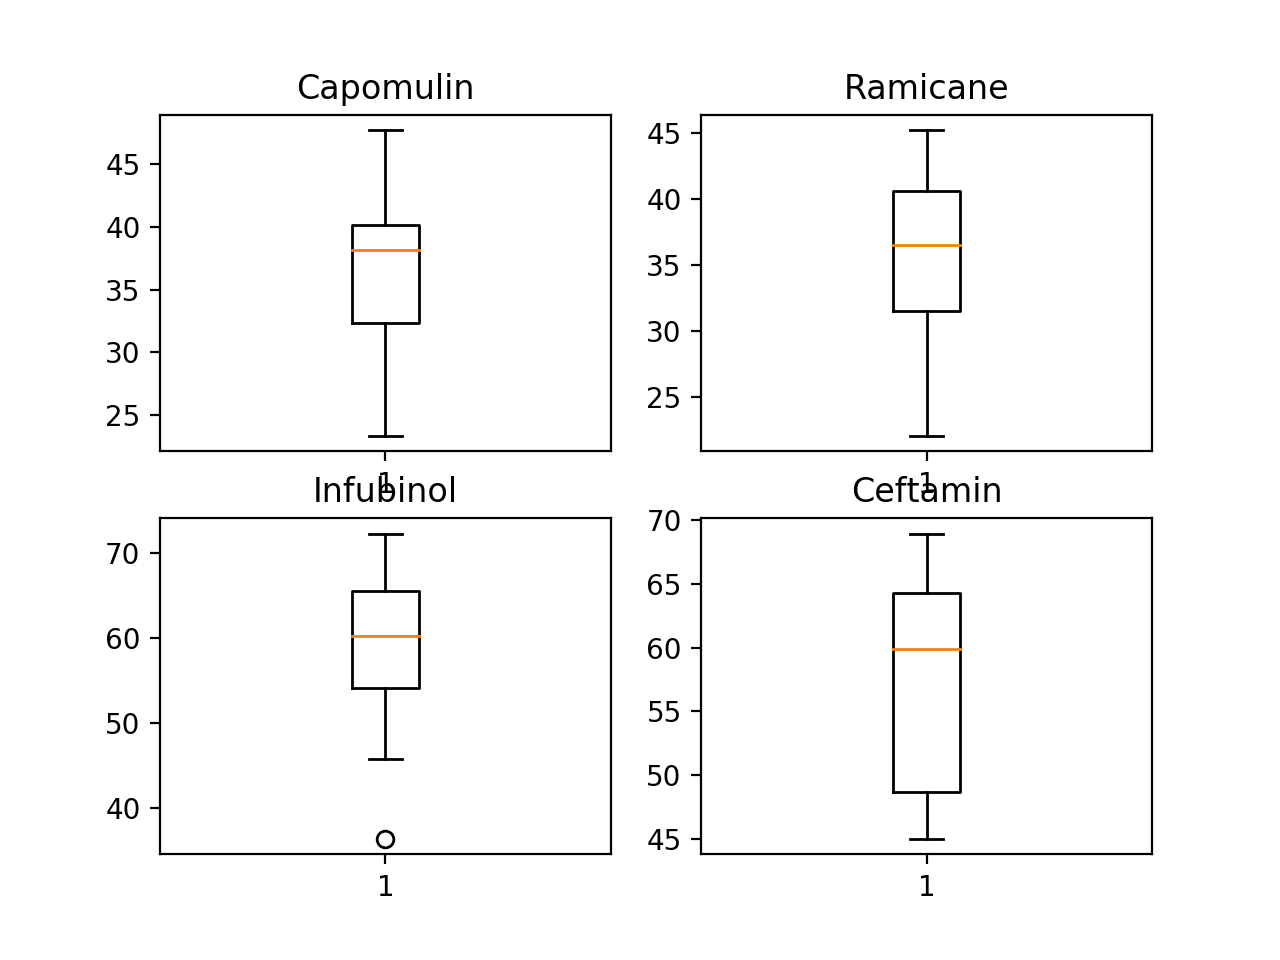

<IPython.core.display.Javascript object>


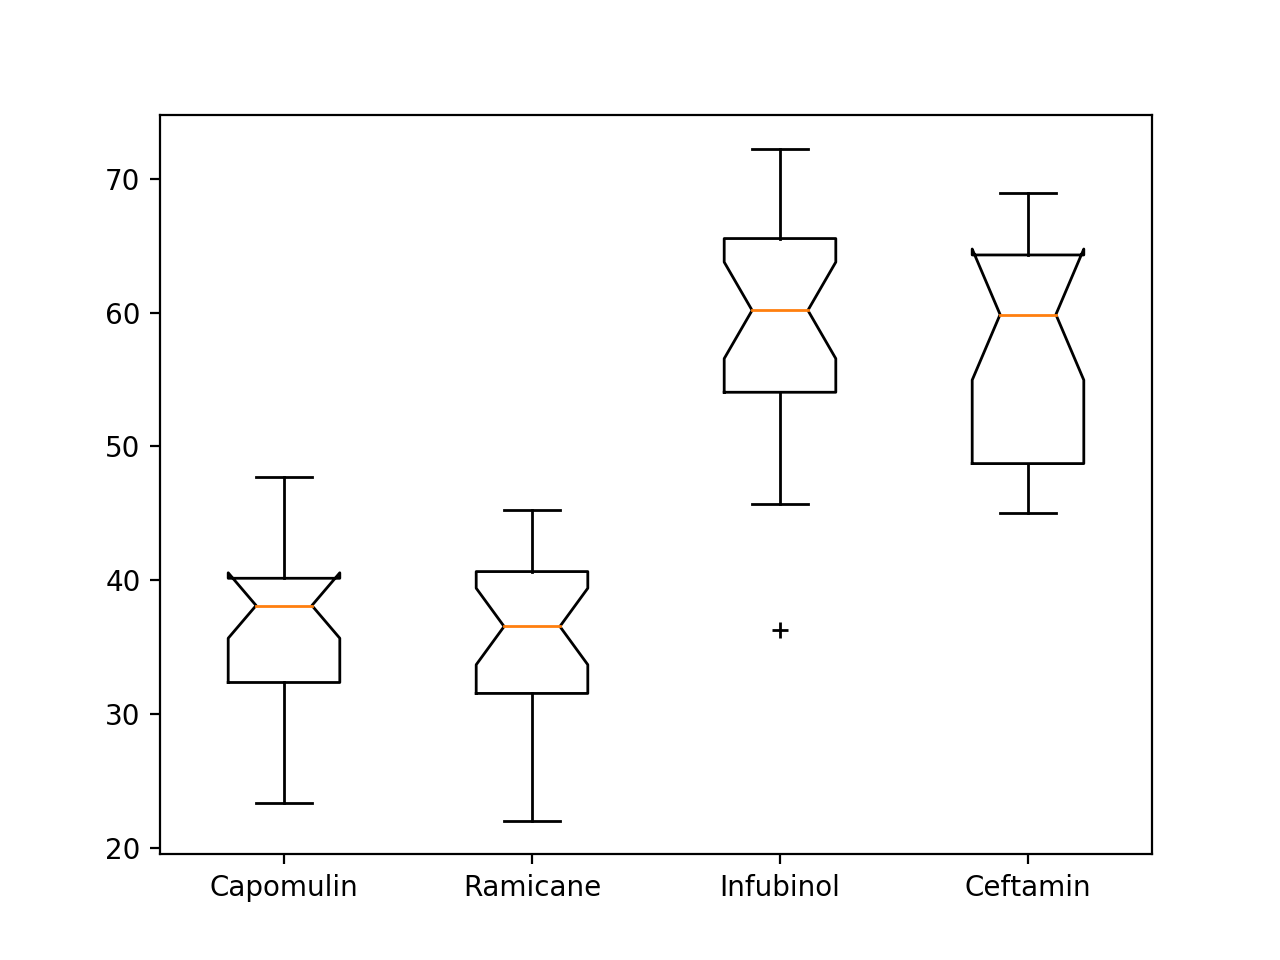

In [7]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

treatments = [capo_tumVol_List, rami_tumVol_List, infl_tumVol_List, ceft_tumVol_List]
    
fig1, axs = plt.subplots(2,2)
axs[0, 0].boxplot(capo_tumVol_List)
axs[0, 0].set_title('Capomulin')
axs[0, 1].boxplot(rami_tumVol_List)
axs[0, 1].set_title('Ramicane')
axs[1, 0].boxplot(infl_tumVol_List)
axs[1, 0].set_title('Infubinol')
axs[1, 1].boxplot(ceft_tumVol_List)
axs[1, 1].set_title('Ceftamin')
plt.show()

fig2, ax = plt.subplots()
labels = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
bp = ax.boxplot(treatments, sym='k+', notch=1, labels=labels)
plt.setp(bp['whiskers'], color='k', linestyle='-')
plt.show()

## Line and scatter plots

<IPython.core.display.Javascript object>


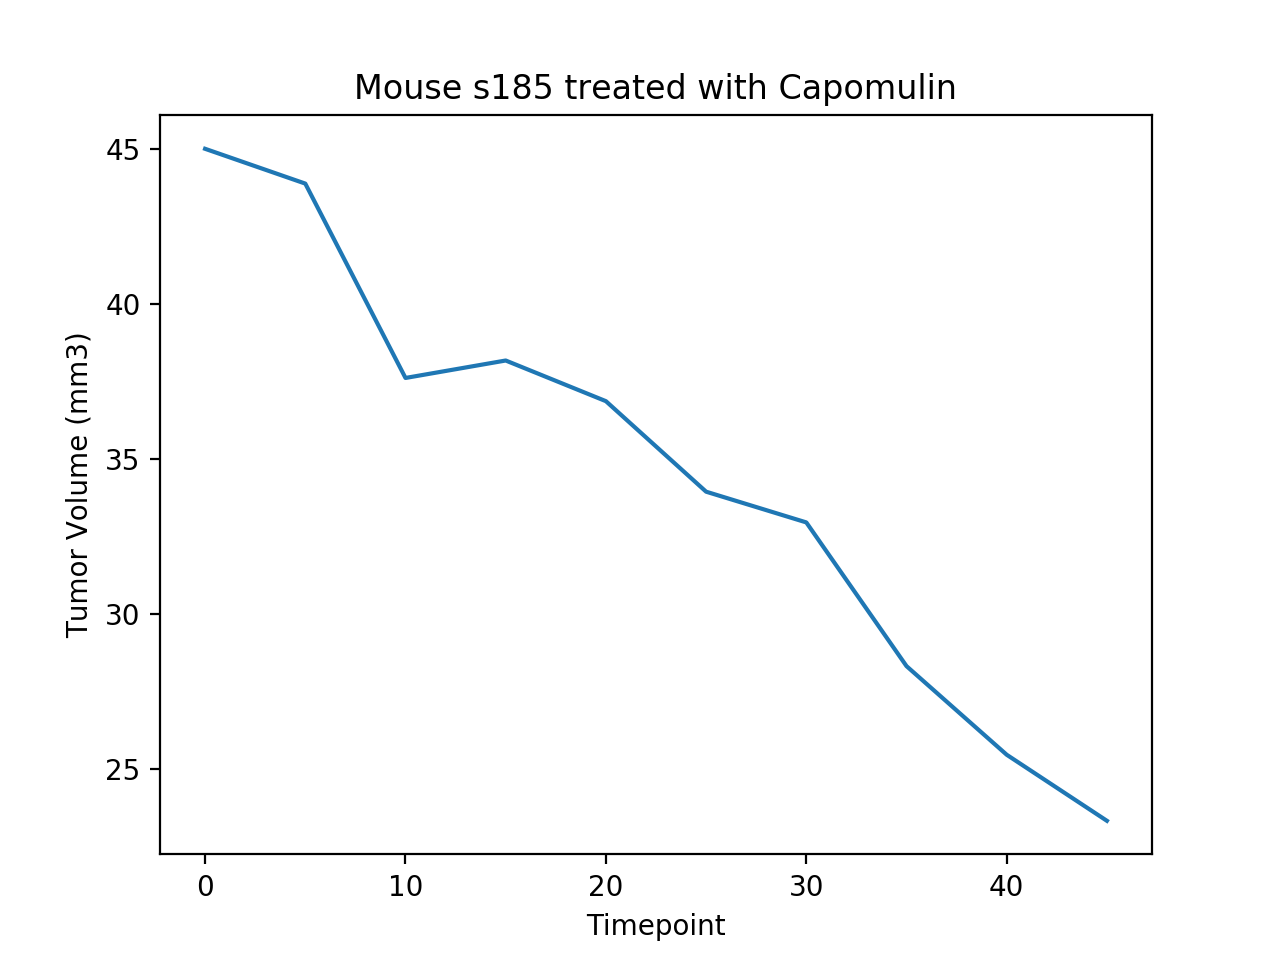

In [10]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_df = capo_df.loc[capo_df['Mouse ID'] == 's185']
time = s185_df['Timepoint']
volume = s185_df['Tumor Volume (mm3)']
fig3, ax3 = plt.subplots()
plt.plot(time, volume)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Mouse s185 treated with Capomulin")
plt.show()

<IPython.core.display.Javascript object>


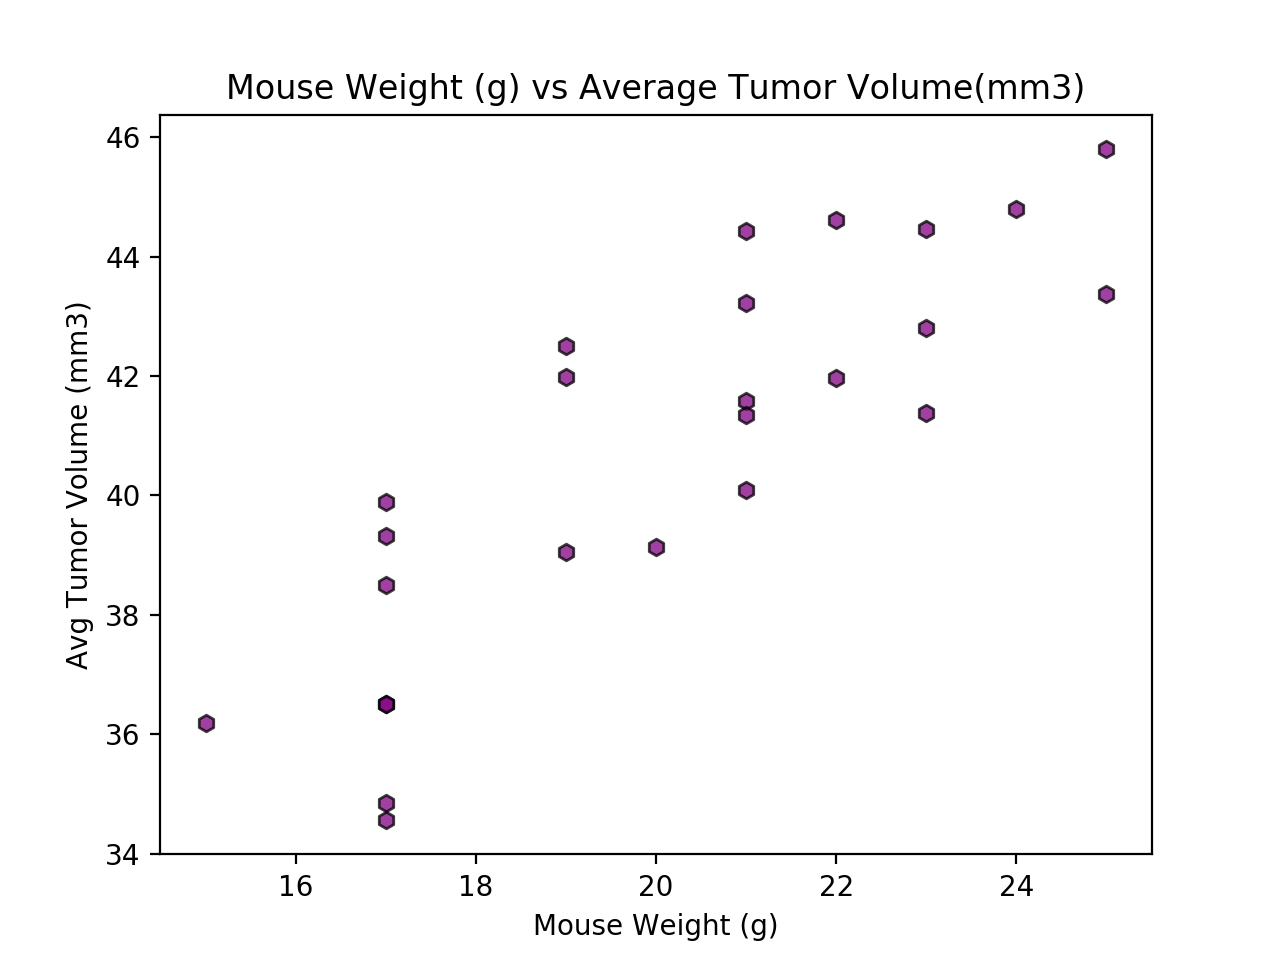

Text(0, 0.5, 'Avg Tumor Volume (mm3)')

In [11]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capo_df_mouse = capo_df.groupby("Mouse ID")
capo_weight_df = capo_df_mouse['Weight (g)'].mean()
capo_meanVol_df = capo_df_mouse['Tumor Volume (mm3)'].mean()
weight_list = []
for row in capo_weight_df:
    weight_list.append(row)
meanVol_list = []
for row in capo_meanVol_df:
    meanVol_list.append(row)
fig4, ax4 = plt.subplots()
plt.scatter(weight_list, meanVol_list, marker="h", facecolors="purple", edgecolors="black", alpha=0.75)
plt.title("Mouse Weight (g) vs Average Tumor Volume(mm3)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")

The correlation between both factors is 0.84


<IPython.core.display.Javascript object>


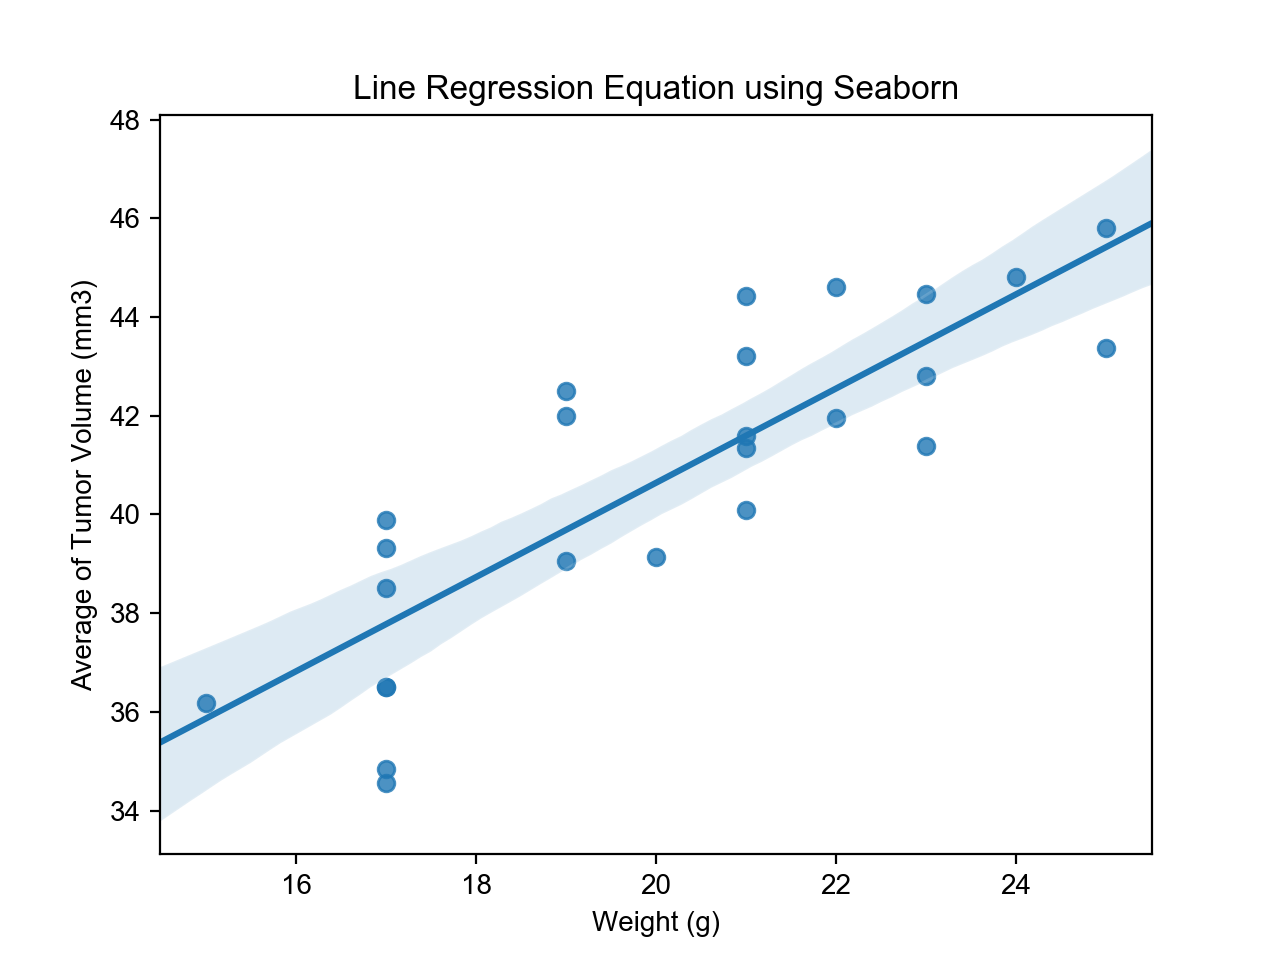

Text(0.5, 1.0, 'Line Regression Equation using Seaborn')

In [12]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
weight_list = []
for row in capo_weight_df:
    weight_list.append(row)
meanVol_list = []
for row in capo_meanVol_df:
    meanVol_list.append(row)


#Calculating Correlation coefficient
CorCoef = st.pearsonr(weight_list,meanVol_list)
print(f"The correlation between both factors is {round(CorCoef[0],2)}")

#Calculating Linear Regression Model

# Add the linear regression equation and line to plot
fig5, ax5 = plt.subplots()
sns.set(color_codes=True)
df = pd.DataFrame(list(zip(weight_list, meanVol_list)))
sns.regplot(x=weight_list, y=meanVol_list, data=df);

plt.xlabel("Weight (g)")
plt.ylabel("Average of Tumor Volume (mm3)")
plt.title("Line Regression Equation using Seaborn")